In [4]:
import numpy as np
import pandas as pd

np.random.seed(12345)
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

In [5]:
from scipy import stats
from scipy.stats import norm
import math
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import ipywidgets as wdg
from IPython.display import display

%matplotlib notebook

<IPython.core.display.Javascript object>


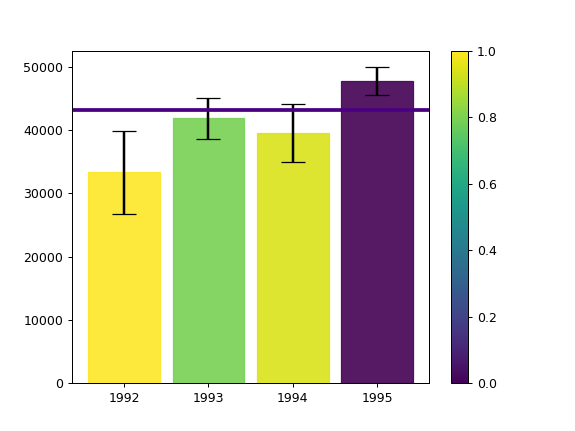

Textarea(value='', description='Y Value:', placeholder='')

In [6]:
df =  df.T
stats = df.describe(percentiles = [0.025, 0.25, 0.5, 0.75, 0.975])
mean = stats.loc['mean']
onesd_meanerror = df.sem(axis = 0)
error_low = onesd_meanerror*1.96
error_high = onesd_meanerror*1.96

fig = plt.figure()
ax = fig.add_subplot(111)
x_axis_label = df.columns.values
plt.xticks(x_axis_label)

bars = (ax.bar(x_axis_label, mean, width=0.85, alpha=0.9, align='center',
                yerr = (error_low, error_high), error_kw={'capsize': 10, 'elinewidth': 2, 'alpha':1}))

txt = wdg.Textarea(
    value='',
    placeholder='',
    description='Y Value:',
    disabled=False)
display(txt)

my_cmap = plt.cm.get_cmap('viridis')
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,1))
sm.set_array([])
cbar = plt.colorbar(sm)

ydataselect = 40000

class ClickChart(object):

    def __init__(self, ax):
        self.fig=ax.figure
        self.ax = ax
        self.horiz_line = ax.axhline(y=ydataselect, color='black', linewidth=2)
        self.fig.canvas.mpl_connect('button_press_event', self.onclick)

    def onclick(self, event):
        self.horiz_line.remove()
        self.ypress = event.ydata
        self.horiz_line = ax.axhline(y=self.ypress, color='indigo', linewidth=3)
        txt.value = str(event.ydata)
        self.color_bar(event)

    def color_bar(self, event):

        for index, bar in enumerate(bars):
            bar.set_color(c=my_cmap(self.calc_prob(index)))
            print(index)

    def calc_prob(self, index):
        global mean, onesd_meanerror
        mean2 = mean.iloc[index] 
        err = onesd_meanerror.iloc[index]
        result = norm.cdf(self.ypress, loc=mean2, scale=err) 
        return result

click = ClickChart(ax)
display(click)